In [1]:
from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd()
# Locate repo root so imports from src work even if notebook moves
while PROJECT_ROOT != PROJECT_ROOT.parent and not (PROJECT_ROOT / 'src').exists():
    PROJECT_ROOT = PROJECT_ROOT.parent

if not (PROJECT_ROOT / 'src').exists():
    raise RuntimeError("Could not locate 'src' directory relative to this notebook")

if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))



──────────────────────────────
Optimal weight vector found for 'bursty' | cost='weighted'
Objective value: 32347.7049
w* (rounded): [0.0701 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.9299]
Sum(w*): 1.0000
──────────────────────────────


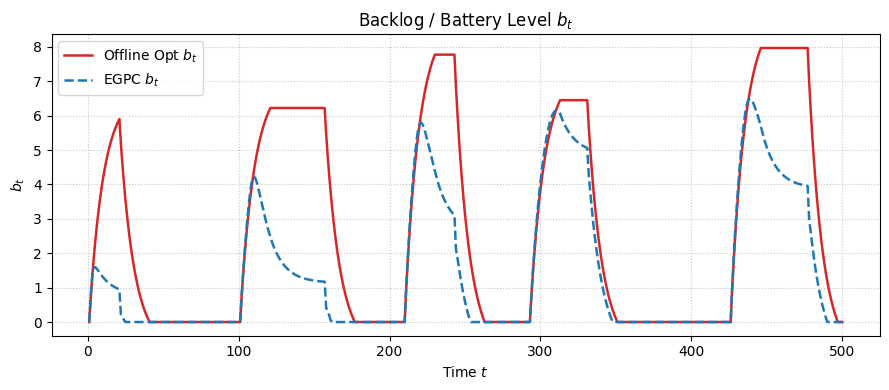

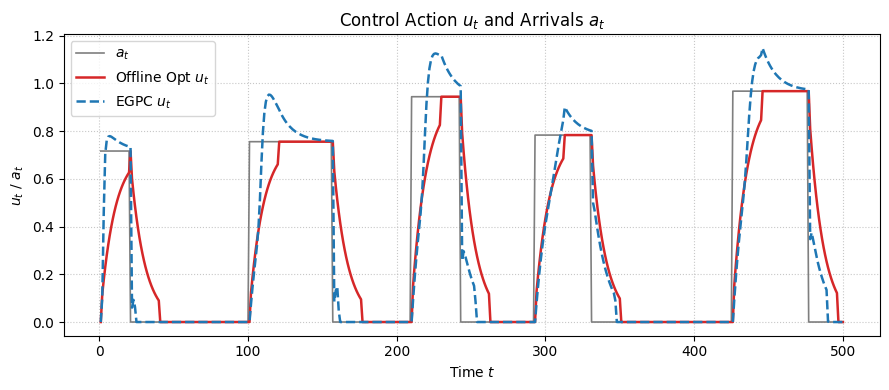

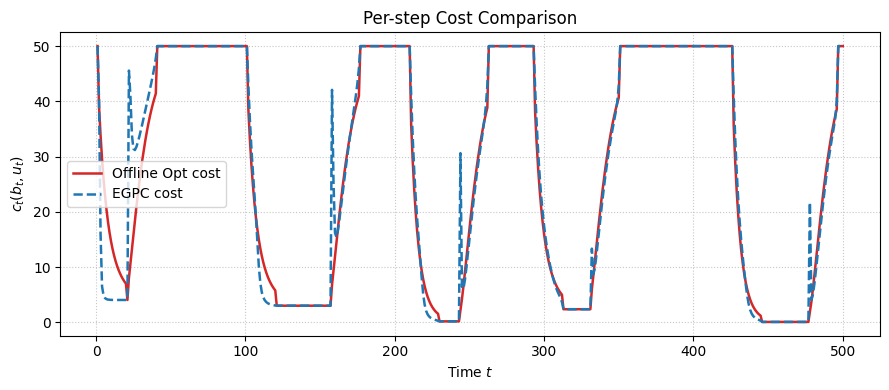


──────────────────────────────
Offline Opt     Total cost: 32347.7049
EGPC            Total cost: 32440.0472
──────────────────────────────


{'total_cost_1': np.float64(32347.7049301914),
 'total_cost_2': np.float64(32440.047215169157),
 'b_diff': np.float64(1.2653025193147573),
 'u_diff': np.float64(0.08492249676224539),
 'cost_diff': np.float64(1.5736783367896043)}

In [2]:
from src.offline_opt import solve_optimal_w
from src.simulate_storage_dynamics import simulate_storage_dynamics
from src.egpc import run_egpc
from src.plots import compare_controllers

# Example usage
opt_data = solve_optimal_w(a_mode="bursty", cost_key="weighted", H=20, T=1000)
opt_sim = simulate_storage_dynamics(
    opt_data["Phi"],
    opt_data["Psi"],
    opt_data["a"],
    opt_data["w_star"],
    cost_fn=opt_data["cost_fn"],
    cost_kwargs=opt_data["cost_kwargs"],
)
egpc_result = run_egpc(
    a_mode="bursty",
    cost_key="weighted",
    eta=0.05,
    H=20,
    T=1000,
    cost_kwargs=opt_data["cost_kwargs"],
)

compare_controllers(opt_sim, "Offline Opt", egpc_result, "EGPC", a=opt_data["a"])
